In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from matplotlib.lines import Line2D
from warnings import filterwarnings
sns.set_style('whitegrid')

In [62]:
df = pd.read_csv('./sample_data/bestsellers with categories.csv')

In [63]:
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [64]:
df.shape

(550, 7)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


This shows that there are no missing values in the data set

In [66]:
df.describe(include='O')

,Name,Author,Genre
count,550,550,550
unique,351,248,2
top,Publication Manual of the American Psychologic...,Jeff Kinney,Non Fiction
freq,10,12,310


In [67]:
df.columns

Index(['Name', 'Author', 'User Rating', 'Reviews', 'Price', 'Year', 'Genre'], dtype='object')

In [68]:
Average_rated = df["User Rating"] < 4.5
df[Average_rated]

,Name,Author,User Rating,Reviews,Price,Year,Genre
5,A Dance with Dragons (A Song of Ice and Fire),George R. R. Martin,4.4,12643,11,2011,Fiction
17,Adult Coloring Book: Stress Relieving Patterns,Blue Star Coloring,4.4,2951,6,2015,Non Fiction
22,Allegiant,Veronica Roth,3.9,6310,13,2013,Fiction
24,And the Mountains Echoed,Khaled Hosseini,4.3,12159,13,2013,Fiction
27,"Autobiography of Mark Twain, Vol. 1",Mark Twain,4.2,491,14,2010,Non Fiction
...,...,...,...,...,...,...,...
530,What to Expect When You're Expecting,Heidi Murkoff,4.4,3341,9,2011,Non Fiction
531,"Wheat Belly: Lose the Wheat, Lose the Weight, ...",William Davis,4.4,7497,6,2012,Non Fiction
532,"Wheat Belly: Lose the Wheat, Lose the Weight, ...",William Davis,4.4,7497,6,2013,Non Fiction
537,Wild: From Lost to Found on the Pacific Crest ...,Cheryl Strayed,4.4,17044,18,2012,Non Fiction


In [69]:
Highest_rated = df["User Rating"] > 4.8
df[Highest_rated]

,Name,Author,User Rating,Reviews,Price,Year,Genre
40,"Brown Bear, Brown Bear, What Do You See?",Bill Martin Jr.,4.9,14344,5,2017,Fiction
41,"Brown Bear, Brown Bear, What Do You See?",Bill Martin Jr.,4.9,14344,5,2019,Fiction
81,Dog Man and Cat Kid: From the Creator of Capta...,Dav Pilkey,4.9,5062,6,2018,Fiction
82,Dog Man: A Tale of Two Kitties: From the Creat...,Dav Pilkey,4.9,4786,8,2017,Fiction
83,Dog Man: Brawl of the Wild: From the Creator o...,Dav Pilkey,4.9,7235,4,2018,Fiction
84,Dog Man: Brawl of the Wild: From the Creator o...,Dav Pilkey,4.9,7235,4,2019,Fiction
85,Dog Man: Fetch-22: From the Creator of Captain...,Dav Pilkey,4.9,12619,8,2019,Fiction
86,Dog Man: For Whom the Ball Rolls: From the Cre...,Dav Pilkey,4.9,9089,8,2019,Fiction
87,Dog Man: Lord of the Fleas: From the Creator o...,Dav Pilkey,4.9,5470,6,2018,Fiction
146,"Goodnight, Goodnight Construction Site (Hardco...",Sherri Duskey Rinker,4.9,7038,7,2012,Fiction


In [70]:
df.sort_values('Reviews',ascending=False).head(10)

,Name,Author,User Rating,Reviews,Price,Year,Genre
534,Where the Crawdads Sing,Delia Owens,4.8,87841,15,2019,Fiction
382,The Girl on the Train,Paula Hawkins,4.1,79446,18,2015,Fiction
383,The Girl on the Train,Paula Hawkins,4.1,79446,7,2016,Fiction
32,Becoming,Michelle Obama,4.8,61133,11,2018,Non Fiction
33,Becoming,Michelle Obama,4.8,61133,11,2019,Non Fiction
137,Gone Girl,Gillian Flynn,4.0,57271,9,2014,Fiction
135,Gone Girl,Gillian Flynn,4.0,57271,10,2012,Fiction
136,Gone Girl,Gillian Flynn,4.0,57271,10,2013,Fiction
368,The Fault in Our Stars,John Green,4.7,50482,13,2014,Fiction
367,The Fault in Our Stars,John Green,4.7,50482,7,2014,Fiction


In [71]:
df.drop_duplicates('Name').sort_values('Reviews',ascending=False).head(10)

,Name,Author,User Rating,Reviews,Price,Year,Genre
534,Where the Crawdads Sing,Delia Owens,4.8,87841,15,2019,Fiction
382,The Girl on the Train,Paula Hawkins,4.1,79446,18,2015,Fiction
32,Becoming,Michelle Obama,4.8,61133,11,2018,Non Fiction
135,Gone Girl,Gillian Flynn,4.0,57271,10,2012,Fiction
365,The Fault in Our Stars,John Green,4.7,50482,13,2012,Fiction
437,The Nightingale: A Novel,Kristin Hannah,4.8,49288,11,2015,Fiction
106,Fifty Shades of Grey: Book One of the Fifty Sh...,E L James,3.8,47265,14,2012,Fiction
433,The Martian,Andy Weir,4.7,39459,9,2015,Fiction
20,All the Light We Cannot See,Anthony Doerr,4.6,36348,14,2014,Fiction
338,The Alchemist,Paulo Coelho,4.7,35799,39,2014,Fiction


In [72]:
Books_by_George_R_R_Martin = df["Author"] == 'George R. R. Martin'
df[Books_by_George_R_R_Martin]

,Name,Author,User Rating,Reviews,Price,Year,Genre
5,A Dance with Dragons (A Song of Ice and Fire),George R. R. Martin,4.4,12643,11,2011,Fiction
6,A Game of Thrones / A Clash of Kings / A Storm...,George R. R. Martin,4.7,19735,30,2014,Fiction


In [73]:
df["Price"].max()

105

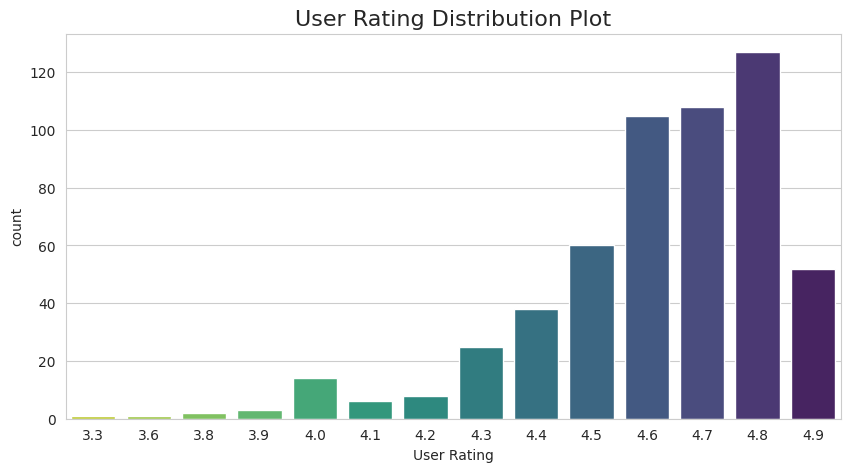

In [74]:
plt.figure(figsize=(10,5))
sns.countplot(x=df['User Rating'],palette='viridis_r')
plt.title('User Rating Distribution Plot',fontsize=16)
plt.show()

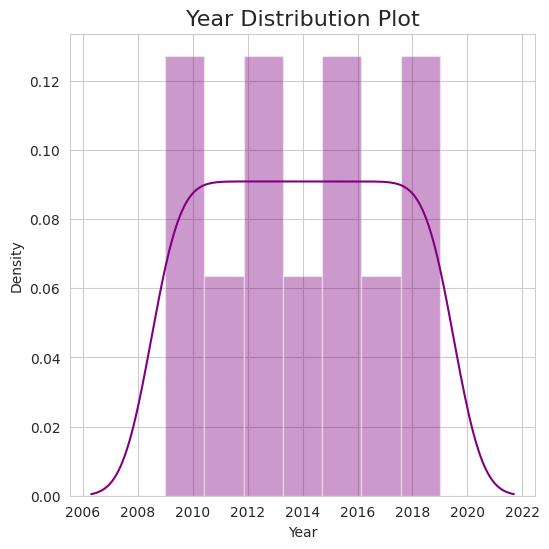

In [75]:
plt.figure(figsize=(6,6))
sns.distplot(df['Year'],color='purple')
plt.title('Year Distribution Plot',fontsize=16)
plt.show()
filterwarnings('ignore')



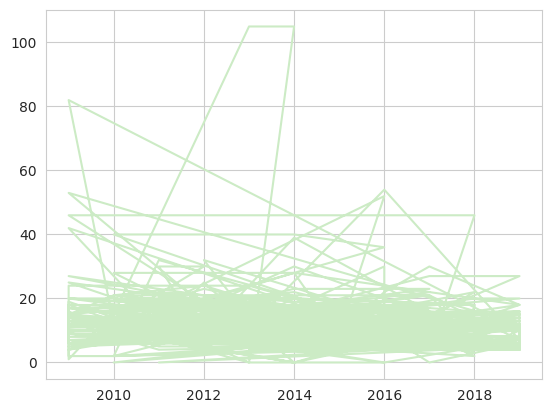

In [76]:
plt.plot(df['Year'],df['Price'])

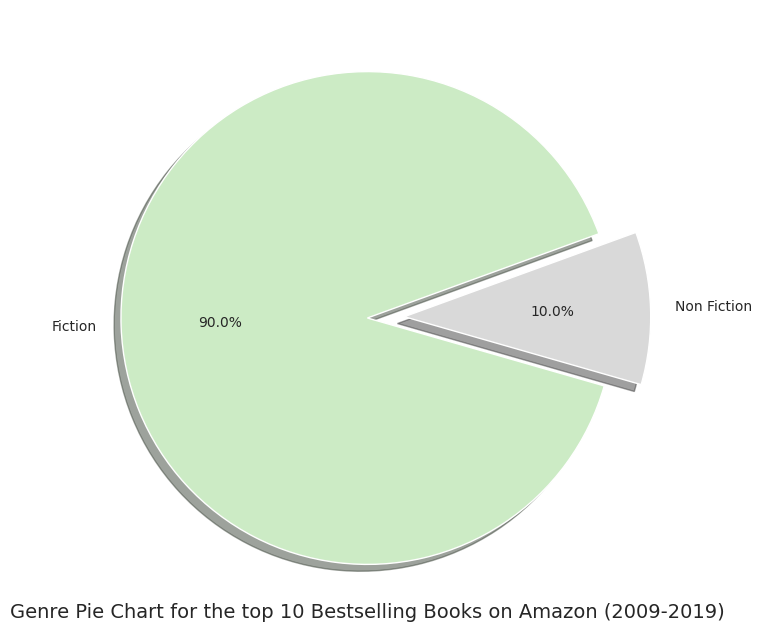

In [77]:
pie_1 = df.drop_duplicates('Name').sort_values('Reviews',ascending=False)['Genre'].head(10).value_counts()
sns.set_palette('Set3_r')
plt.figure(figsize=(8,8))
plt.pie(pie_1,explode = [0,0.15],labels=['Fiction','Non Fiction'],autopct='%.1f%%',shadow=True,startangle=20)
plt.title('Genre Pie Chart for the top 10 Bestselling Books on Amazon (2009-2019)',fontdict={'size':14},y=0);

<Axes: xlabel='Genre', ylabel='Reviews'>

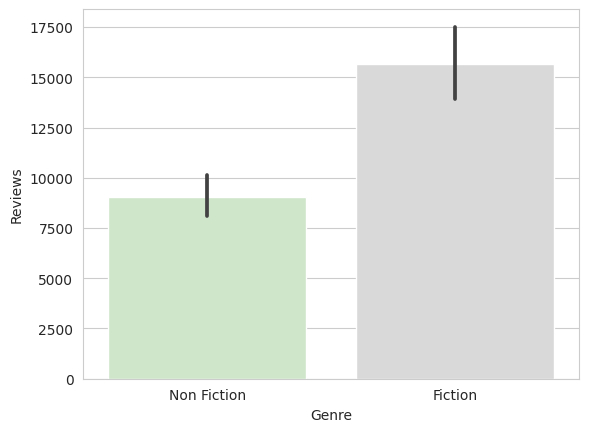

In [78]:
sns.barplot( data = df , x = 'Genre', y = 'Reviews' )

In [79]:
Counter(df.drop_duplicates('Name')['Author']).most_common()[0]

('Jeff Kinney', 12)

In [80]:
new_df = df.drop_duplicates('Name')
new_df[new_df['Author'] == "Jeff Kinney"]

,Name,Author,User Rating,Reviews,Price,Year,Genre
42,"Cabin Fever (Diary of a Wimpy Kid, Book 6)",Jeff Kinney,4.8,4505,0,2011,Fiction
71,"Diary of a Wimpy Kid: Hard Luck, Book 8",Jeff Kinney,4.8,6812,0,2013,Fiction
72,Diary of a Wimpy Kid: The Last Straw (Book 3),Jeff Kinney,4.8,3837,15,2009,Fiction
73,Diary of a Wimpy Kid: The Long Haul,Jeff Kinney,4.8,6540,22,2014,Fiction
80,"Dog Days (Diary of a Wimpy Kid, Book 4) (Volum...",Jeff Kinney,4.8,3181,12,2009,Fiction
88,Double Down (Diary of a Wimpy Kid #11),Jeff Kinney,4.8,5118,20,2016,Fiction
253,Old School (Diary of a Wimpy Kid #10),Jeff Kinney,4.8,6169,7,2015,Fiction
381,The Getaway,Jeff Kinney,4.8,5836,0,2017,Fiction
435,The Meltdown (Diary of a Wimpy Kid Book 13),Jeff Kinney,4.8,5898,8,2018,Fiction
468,"The Third Wheel (Diary of a Wimpy Kid, Book 7)",Jeff Kinney,4.7,6377,7,2012,Fiction


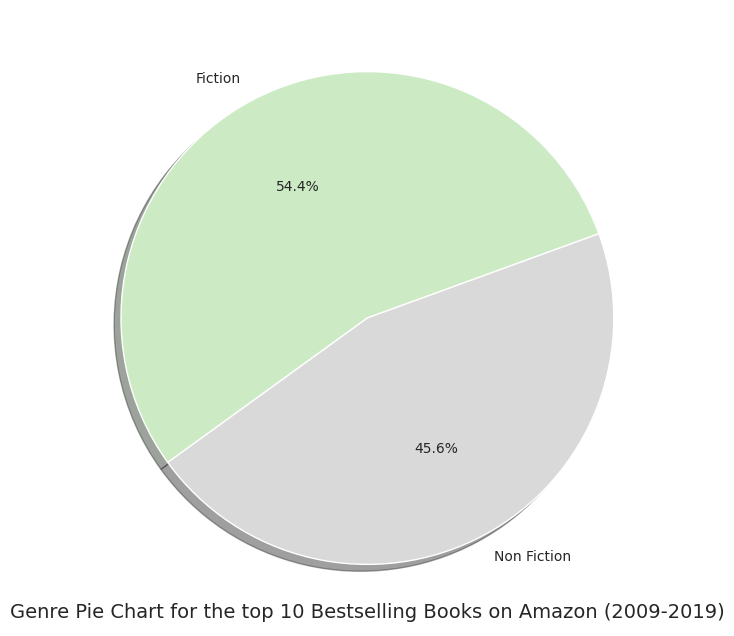

In [81]:
pie_1 = df.drop_duplicates('Name').sort_values('Reviews',ascending=False)['Genre'].value_counts()
sns.set_palette('Set3_r')
plt.figure(figsize=(8,8))
plt.pie(pie_1,explode = [0,0],labels=['Fiction','Non Fiction'],autopct='%.1f%%',shadow=True,startangle=20)
plt.title('Genre Pie Chart for the top 10 Bestselling Books on Amazon (2009-2019)',fontdict={'size':14},y=0);

In [82]:
Books_fav = df["Name"].str.contains('Harry Potter')
Books_fav = df[Books_fav]
type(Books_fav)

pandas.core.frame.DataFrame

In [83]:
Books_fav.max()

Name           The Unofficial Harry Potter Cookbook: From Cau...
Author                                                Scholastic
User Rating                                                  4.9
Reviews                                                    23973
Price                                                         52
Year                                                        2019
Genre                                                Non Fiction
dtype: object

In [84]:
df.max()

Name           You Are a Badass: How to Stop Doubting Your Gr...
Author                                              Zhi Gang Sha
User Rating                                                  4.9
Reviews                                                    87841
Price                                                        105
Year                                                        2019
Genre                                                Non Fiction
dtype: object